In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("D:\projects\R Project - Attrition\Attrition.csv")

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
data.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


In [5]:
data.shape

(1470, 35)

In [6]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
data.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [13]:
numerical = data.dtypes[data.dtypes != "object"].index
print("numerical features:\n", numerical)

print("--"*50)

categorical = data.dtypes[data.dtypes== "object"].index
print("categorical features:\n", categorical)

numerical features:
 Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
----------------------------------------------------------------------------------------------------
categorical features:
 Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


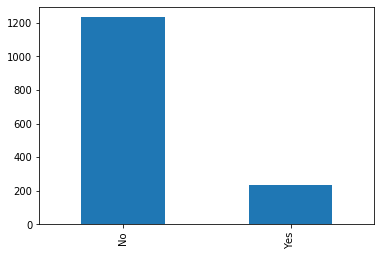

In [14]:
data["Attrition"].value_counts().plot(kind = "bar", x = data["Attrition"])

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


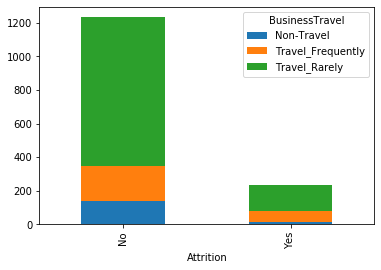

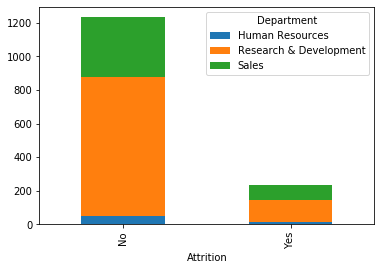

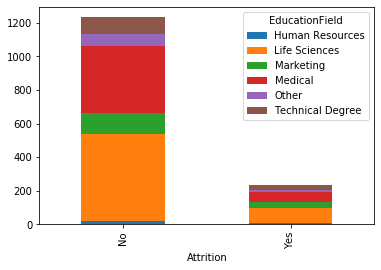

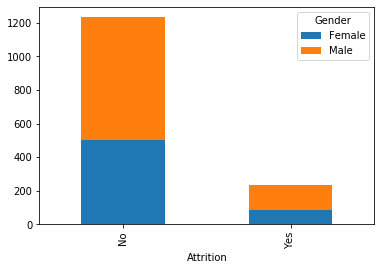

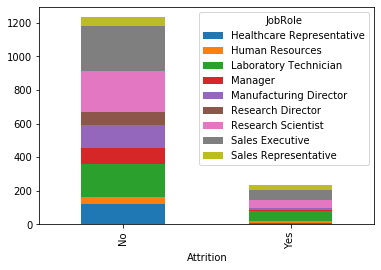

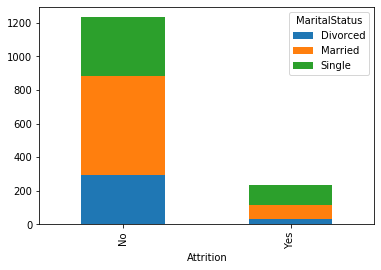

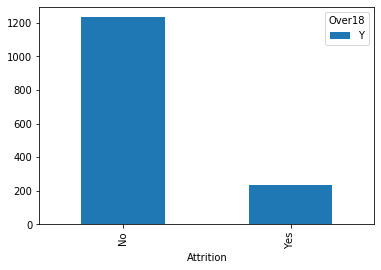

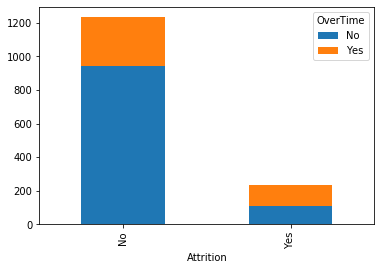

In [15]:
cat = categorical.tolist()
type(cat)
print(cat)

for x in cat:
    if x != "Attrition":
        data[categorical].groupby(["Attrition", x])[x].count().unstack().plot(kind = "bar", stacked = True) 

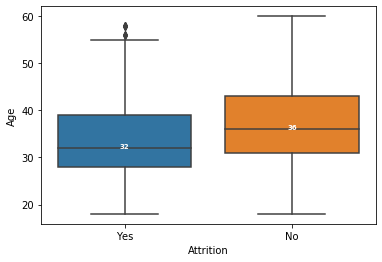

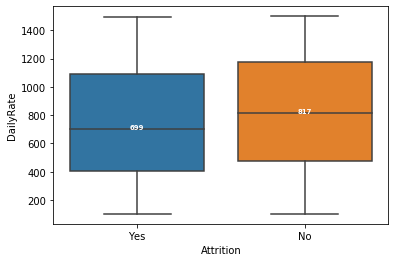

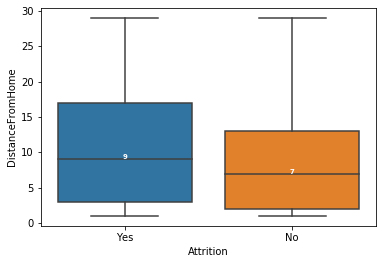

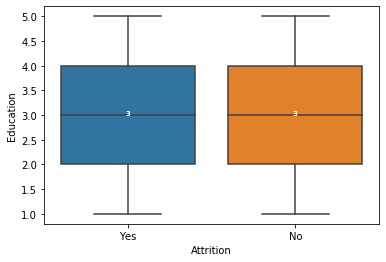

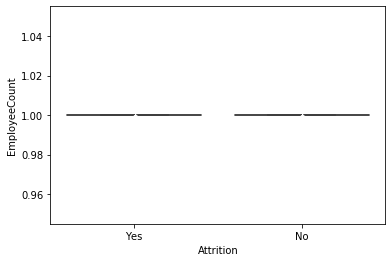

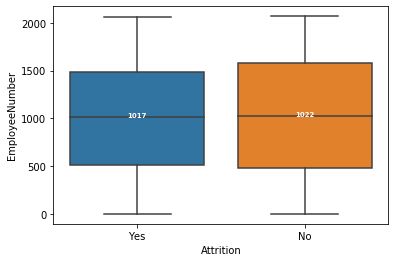

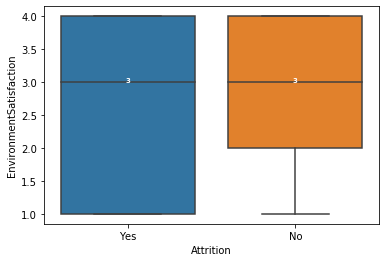

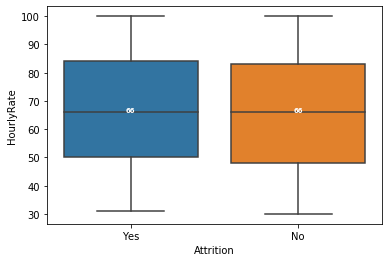

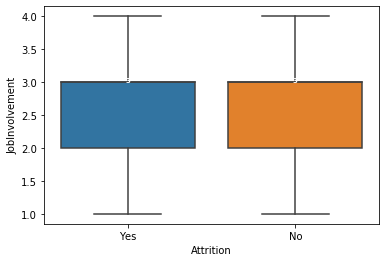

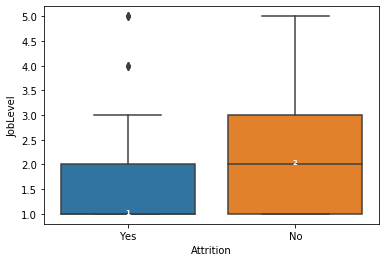

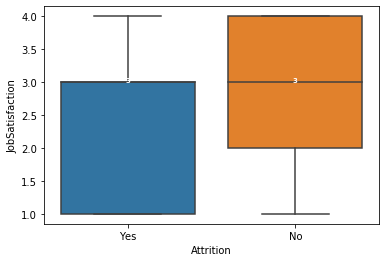

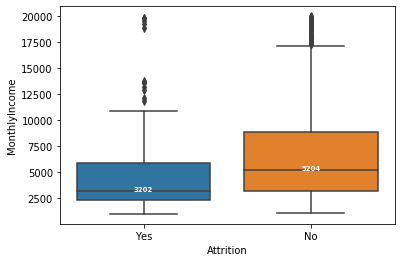

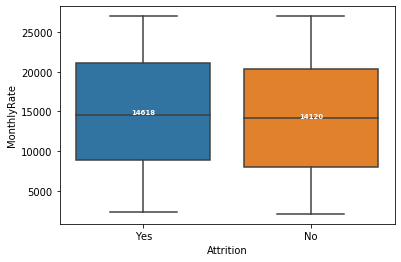

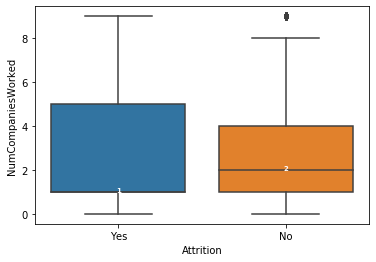

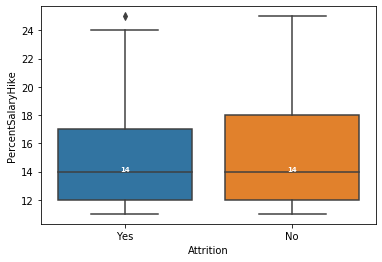

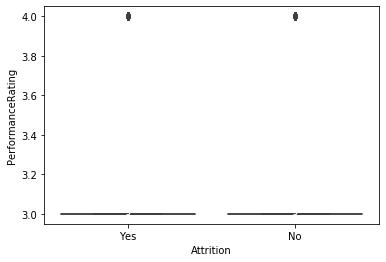

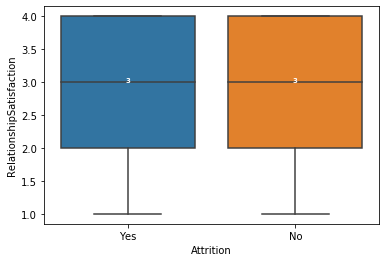

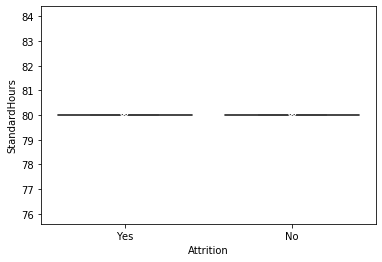

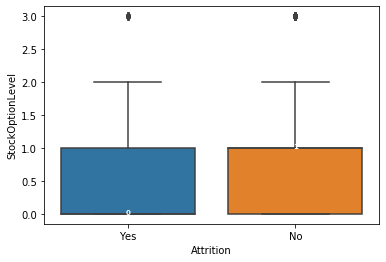

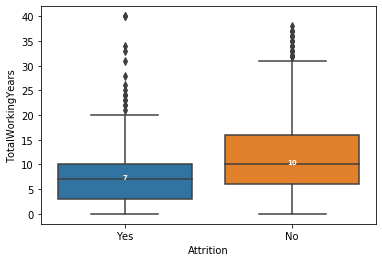

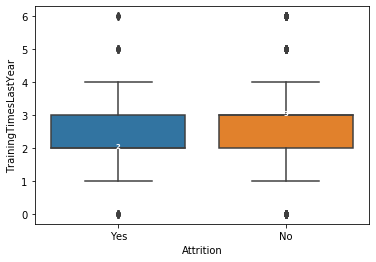

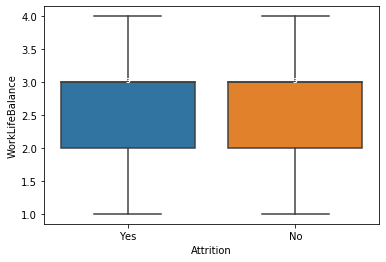

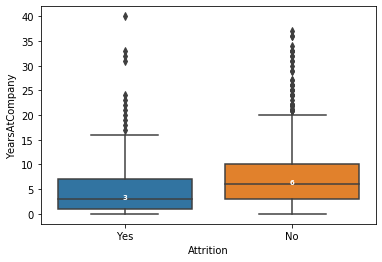

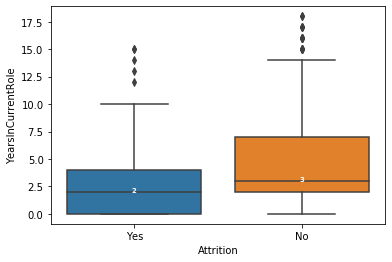

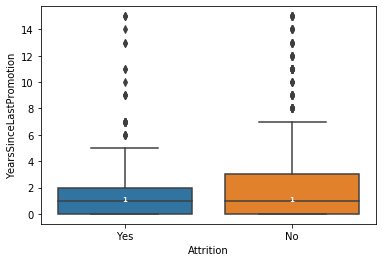

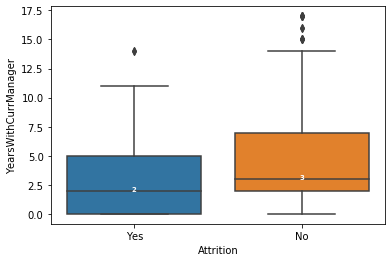

In [18]:
import warnings
warnings.filterwarnings("ignore")
num = numerical.tolist()

for j in num:
    fig, ax = plt.subplots()
    ax = sns.boxplot(y = data[j], x = data["Attrition"], data = data)
    median = data.groupby(['Attrition'])[j].median().values
    median_labels = [str(np.round(s, 2)) for s in median]
    pos = range(len(median))
    for i in pos:
        ax.text(pos[i-1], median[i], median_labels[i], 
        horizontalalignment='center', size='x-small', color='w', weight='semibold')

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
data.Attrition=le.fit_transform(data.Attrition)
data.BusinessTravel=le.fit_transform(data.BusinessTravel)
data.Department=le.fit_transform(data.Department)
data.EducationField=le.fit_transform(data.EducationField)
data.Gender=le.fit_transform(data.Gender)
data.JobRole=le.fit_transform(data.JobRole)
data.MaritalStatus=le.fit_transform(data.MaritalStatus)
data.OverTime=le.fit_transform(data.OverTime)
data=data.drop(['Over18','EmployeeCount','EmployeeNumber'],axis=1)

In [15]:
data.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0


In [16]:
data_x=data.drop(['Attrition'],axis=1)
data_y=data.Attrition

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
data_x_train,data_x_test,data_y_train,data_y_test=train_test_split(data_x,data_y,test_size=0.2,random_state=101)